# YouTube QoE

[![nbviewer](https://raw.githubusercontent.com/jupyter/design/main/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/intrig-unicamp/hackathon5G/blob/main/datasets/youtube-qoe.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/intrig-unicamp/hackathon5G/blob/main/datasets/youtube-qoe.ipynb)

Esse Notebook contém uma breve análise dos dados que o YouTube coleta para telemetria dos seus clientes (Web Desktop, Web Mobile, IFrame API, App). Os participantes são encorajados a experimentar com os dados para descobrir padrões, formas de resolver problemas no contexto da Hackathon.

Os dados utilizados nesse Notebook foram extraídos a partir de coletas usando [`PCAPdroid`](https://github.com/emanuele-f/PCAPdroid) + [`PCAPdroid-mitm addon`](https://github.com/emanuele-f/PCAPdroid-mitm) (Android) resulta em arquivos `PCAP`.

## Importando dependências globais

In [ ]:
### configuração do ambiente Google Colab ###
import os
COLAB_PATH = '/content/hackathon5G'
PWD_PATH = f'{COLAB_PATH}/datasets'
if os.path.exists('/content') and not os.path.exists(f'{COLAB_PATH}/README.md'):
    !pip install --quiet pandas==2.0.1 numpy==1.22.4 scikit-learn==1.2.2 seaborn==0.12.2 plotly==5.14.1
    !git clone --quiet --depth=1 https://github.com/intrig-unicamp/hackathon5G.git {COLAB_PATH}
if os.path.exists(PWD_PATH):
    os.chdir(PWD_PATH)

In [1]:
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import datetime

pd.set_option('display.max_columns', None)

def count_decimal_places(num):
    str_num = str(num)
    if '.' in str_num:
        return len(str_num) - str_num.index('.') - 1
    else:
        return 0

pd.set_option('display.float_format', lambda x: '{:.{}f}'.format(x, min(count_decimal_places(x), 6)))

def pd_insert_beside(df, column_name, value):
    df.insert(df.columns.get_loc(value.name) + 1, column_name, value)

## Carregando os dados

Os arquivos de dados PCAP foram gerados a partir da interceptação das métricas de tráfego com o uso do [`PCAPdroid`](https://github.com/emanuele-f/PCAPdroid) e o plugin [`PCAPdroid-mitm`](https://github.com/emanuele-f/PCAPdroid-mitm) para descriptografar os pacotes TLS. Para gerar os dados de tráfego no _Samsung S21 5G_, tocamos uma playlist com alta resolução no YouTube Web Mobile. Os dados no formato PCAP estão apresentados a segui.

Usando o pacote `pyshark` (um _wrapper_ do aplicativo de linha de comando `tshark`), os arquivos PCAP/NG foram abertos para extrair as requisições de interesse filtradas por `http2.header.value contains "api/stats/qoe"`, em seguida pré-processadas e disponibilizadas em Dataframes pandas no formato `.pickle`.

In [2]:
DATA_PATH_PREFIX = '.'
YOUTUBE_QOE_PATH = os.path.join(DATA_PATH_PREFIX, 'youtube-qoe')

Feito isso, vamos colocar de volta as demais colunas no Dataframe e ordenar

In [3]:
datasets = [ os.path.join(YOUTUBE_QOE_PATH, file) for file in os.listdir(YOUTUBE_QOE_PATH) ]

ytDf = pd.concat([ pd.read_pickle(dataset) for dataset in datasets ], ignore_index=True).copy()
ytDf.sort_values('time', inplace=True, ignore_index=True)

O Dataframe resultante é o seguinte:

In [4]:
ytDf

,time,time_seconds,session_time,fmt,afmt,cpn,el,ns,fexp,cl,seq,docid,ei,event,plid,cbrand,cbr,cbrver,c,cver,cplayer,cmodel,cos,cosver,cplatform,afs,vfs,vis,conn,user_intent,ctmp,vps,cmt,bh,bwe,df,bwm.downloaded_bytes,bwm.seconds_to_download,bat.percentage,bat.is_charging,view.width,view.height,referrer,sdetail,sourceid,feature,content_v,adformat,adcontext,ad_playback,qoealert
0,2023-02-17 02:20:03.329911040,1676600403.329911,0.0,243,251,oMaRrct9XOA6WR0D,detailpage,yt,"23848211,23983296,24004644,24007246,24080738,2...",509820939,1,d5r-kEmQfBg,gA7vY83zJeyPobIPq_OcmAg,streamingstats,AAX03ncKwXUwJiIT,samsung,Chrome Mobile,109.0.0.0,MWEB,2.20230215.10.00,UNIPLAYER,sm-g991b,Android,13,MOBILE,0.008:251::i,0.008:243:243::d,0.008:0,0.008:1,NaN,NaN,unstarted/cued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-17 02:20:03.337910784,1676600403.337911,0.008,243,251,oMaRrct9XOA6WR0D,detailpage,yt,"23848211,23983296,24004644,24007246,24080738,2...",509820939,1,d5r-kEmQfBg,gA7vY83zJeyPobIPq_OcmAg,streamingstats,AAX03ncKwXUwJiIT,samsung,Chrome Mobile,109.0.0.0,MWEB,2.20230215.10.00,UNIPLAYER,sm-g991b,Android,13,MOBILE,0.008:251::i,0.008:243:243::d,0.008:0,0.008:1,NaN,NaN,unstarted/cued,0.0,0.0,752419.0,NaN,NaN,NaN,NaN,NaN,360.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-17 02:20:03.366910976,1676600403.366911,0.037,243,251,oMaRrct9XOA6WR0D,detailpage,yt,"23848211,23983296,24004644,24007246,24080738,2...",509820939,2,d5r-kEmQfBg,gA7vY83zJeyPobIPq_OcmAg,streamingstats,AAX03ncKwXUwJiIT,samsung,Chrome Mobile,109.0.0.0,MWEB,2.20230215.10.00,UNIPLAYER,sm-g991b,Android,13,MOBILE,NaN,NaN,NaN,NaN,0.0,NaN,buffering,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-17 02:20:04.187910912,1676600404.187911,0.858,243,251,oMaRrct9XOA6WR0D,detailpage,yt,"23848211,23983296,24004644,24007246,24080738,2...",509820939,2,d5r-kEmQfBg,gA7vY83zJeyPobIPq_OcmAg,streamingstats,AAX03ncKwXUwJiIT,samsung,Chrome Mobile,109.0.0.0,MWEB,2.20230215.10.00,UNIPLAYER,sm-g991b,Android,13,MOBILE,NaN,NaN,NaN,NaN,0.0,NaN,playing,0.063,7.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-02-17 02:20:04.939910912,1676600404.939911,1.61,243,251,oMaRrct9XOA6WR0D,detailpage,yt,"23848211,23983296,24004644,24007246,24080738,2...",509820939,2,d5r-kEmQfBg,gA7vY83zJeyPobIPq_OcmAg,streamingstats,AAX03ncKwXUwJiIT,samsung,Chrome Mobile,109.0.0.0,MWEB,2.20230215.10.00,UNIPLAYER,sm-g991b,Android,13,MOBILE,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,2023-02-24 20:33:24.100381952,1677270804.100382,10.008,396,251,8qT53QJIe-uAItWx,detailpage,yt,"23983296,24004644,24007246,24080738,24135310,2...",511930715,3,aqz-KE-bpKQ,OUn5Y_-AD-SQ4dUPy8ipgAE,streamingstats,AAX1eo2OhsF1-Khx,samsung,Chrome Mobile,110.0.0.0,MWEB,2.20230224.00.00,UNIPLAYER,sm-g991b,Android,13,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,playing,9.239,40.964,1008743.0,NaN,1722057.0,0.918,48.0,False,NaN,NaN,https://m.youtube.com/watch?v=OHOpb2fS-cM&list...,p:m.youtube.com/watch,r,autoplay,NaN,NaN,NaN,NaN,NaN
779,2023-02-24 20:34:04.099382016,1677270844.099382,50.007,396,251,8qT53QJIe-uAItWx,detailpage,yt,"23983296,24004644,24007246,24080738,24135310,2...",511930715,4,aqz-KE-bpKQ,OUn5Y_-AD-SQ4dUPy8ipgAE,streamingstats,AAX1eo2OhsF1-Khx,samsung,Chrome Mobile,110.0.0.0,MWEB,2.20230224.00.00,UNIPLAYER,sm-g991b,Android,13,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,playing,49.246,90.848,365756.0,3.0,4371900.0,2.707,48.0,False,NaN,NaN,https://m.youtube.com/watch?v=OHOpb2fS-cM&list...,p:m.youtube.com/watch,r,autoplay,NaN,NaN,NaN,NaN,NaN
780,2023-02-24 20:34:44.094382080,1677270884.094382,90.002,396,251,8qT53QJIe-uAItWx,detailpage,yt,"23983296,24004644,24007246,24080738,24135310,2...",511930715,5,a

# Colunas

Foram identificados os respectivos significados das colunas listadas abaixo.

- **Identificadores**
    - `docid`: identificador do vídeo, similar ao encontrado na URL
    - `event`: tipo de evento registrado, sempre definido como `streamingstats`
    - `seq` (sequence): número de sequência da amostra de QoE
    - `cpn` (client playback nonce): identificador único para a sessão de reprodução, equivalente ao valor sCPN mostrado no painel _stats for nerds_
    - `ei` (eventId)
    - `fexp` (experimentIds): IDs dos experimentos sendo testados na sessão de reprodução

- **Ambiente do player**
    - `c` (client): Plataforma do cliente, podendo ser `WEB_EMBEDDED_PLAYER`, `WEB` (incompleto. valores dos clientes Android e iOS ainda não identificados)
    - `el` (event label): rótulo do evento, indicando o tipo de página onde o vídeo está incorporado, como `detailpage`, `adunit`, `embedded`, `embedded_unbranded`, `shortspage`

- **Player**
    - `view` (view size, getPlayerSize/getSize): tamanho da visualização do player, contendo a largura e altura
    - `vps` (video player state): o estado do player de vídeo (N/-1: não iniciado, EN/0: terminado, PL/1: reproduzindo, PA/2: pausado, B/3: em buffer, N/5: vídeo pronto para reproduzir)
    - `vis` (visibility status, getVisibilityState): status de visibilidade (valores não identificados)
    - `cmt` (client measurement time): o timestamp e a posição correspondente do vídeo (em segundos)

- **Buffer**
    - `bh` (buffer health): qualidade do buffer (representado em segundos)
    - `df` (dropped frames): número de frames descartados

- **Velocidade de conexão**
    - `bwe` (bandwidth estimation): largura de banda estimada (em bytes)
    - `bwm` (bandwidth measurement): os bytes baixados de áudio e vídeo (do endpoint `*.googlevideo.com/videoplayback`) e o tempo necessário para o download

- **Dispositivo**
    - `bat` (battery): porcentagem carregada e booleano que indica se está carregando


Colunas ainda não identificadas:
- `ns`: sempre definido como `yt`
- `fmt` (video format/codec), `afmt` (audio format/codec): valores reais do formato/resolução de vídeo e áudio não identificados (em vez de apenas um identificador)
- `vfs` (video format switch?), `afs` (audio format switch?)
- `ctmp`
- `stream`
- `user_intent`
- `dt`
- `cl`
- `osid`
- `plid`

## Exploração

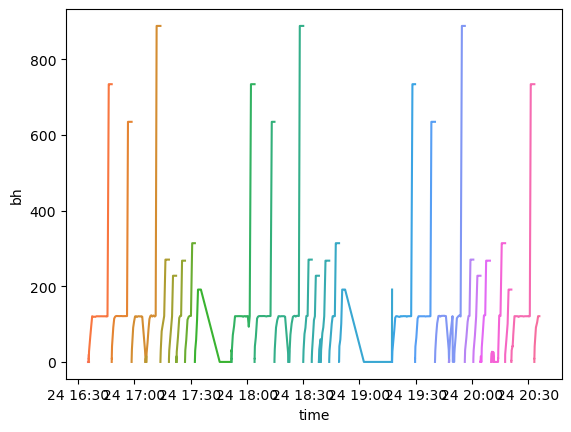

In [5]:
g = sns.lineplot(data=ytDf[-762:], x='time', y='bh', hue='cpn')
g.legend([],[], frameon=False)

In [6]:
import matplotlib.ticker as tkr  

def sizeof_format(x, pos):
    if x < 0:
        return ''
    for x_unit in ['bytes', 'kB', 'MB', 'GB', 'TB']:
        if x < 1024.:
            return '%3.1f %s' % (x, x_unit)
        x /= 1024.

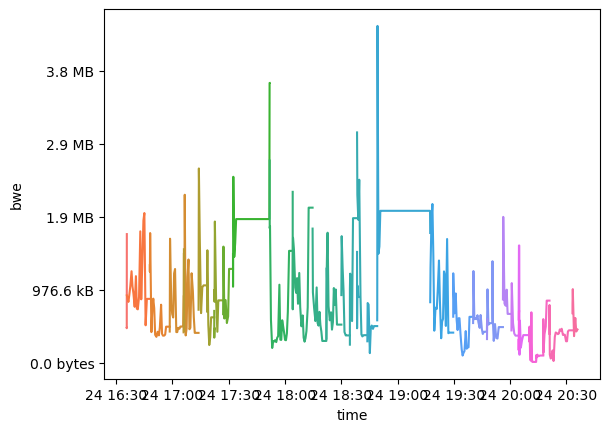

In [7]:
g = sns.lineplot(data=ytDf[-762:], x='time', y='bwe', hue='cpn')
g.yaxis.set_major_formatter(tkr.FuncFormatter(sizeof_format))
g.legend([],[], frameon=False)